In [0]:
## Project Objectives
# The objective of the project is to learn how to implement a simple image classification pipeline based on the k-Nearest Neighbour and a deep neural network. The goals of this assignment are as follows:      
# ● Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)  
# ● Data fetching and understand the train/val/test splits.  
# ● Implement and apply an optimal k-Nearest Neighbor (kNN) classifier (7.5 points) 
# ● Print the classification metric report (2.5 points) 
# ● Implement and apply a deep neural network classifier including (feedforward  neural network, RELU activations) (5 points) 
# ● Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions) (2.5 points) 
# ● Implement batch normalization for training the neural network (2.5 points) 
# ● Understand the differences and trade-offs between traditional and NN classifiers with the help of classification metrics (5 points)

In [2]:
## Importing the required libraries..

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import h5py
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

dataFromFile = h5py.File('/content/drive/My Drive/SVHN_single_grey1.h5', 'r')

X_train = dataFromFile['X_train']
X_train_original = dataFromFile['X_train']
X_test = dataFromFile['X_test']
y_test = dataFromFile['y_test']
y_train = dataFromFile['y_train']
    
X_train = X_train[:].reshape(-1, 1024) /255
X_test = X_test[:].reshape(-1, 1024) /255

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


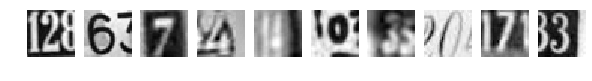

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [3]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train_original[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

In [0]:
# Flatenning the data..
X_train_sub = X_train[:3000]
y_train_sub = y_train[:3000]
X_test_sub = X_test[:2000]
y_test_sub = y_test[:2000]

In [5]:
from sklearn.neighbors import KNeighborsClassifier

# # train & test KNN classifier
for k in range(1,30):
    knnClassifier = KNeighborsClassifier(n_neighbors=k, weights = 'uniform', metric='euclidean')
    knnClassifier.fit(X_train_sub, y_train_sub)

    score = knnClassifier.score(X_test_sub, y_test_sub)
    print(f"When k={k} score is {score*100}")
    
# KNN produces a test accuracy of 35.6% for k value 16...

When k=1 score is 32.45
When k=2 score is 31.2
When k=3 score is 31.3
When k=4 score is 32.75
When k=5 score is 32.9
When k=6 score is 33.95
When k=7 score is 34.2
When k=8 score is 34.949999999999996
When k=9 score is 34.599999999999994
When k=10 score is 34.599999999999994
When k=11 score is 35.449999999999996
When k=12 score is 35.099999999999994
When k=13 score is 34.2
When k=14 score is 34.9
When k=15 score is 34.849999999999994
When k=16 score is 35.6
When k=17 score is 35.25
When k=18 score is 35.15
When k=19 score is 34.65
When k=20 score is 34.4
When k=21 score is 34.8
When k=22 score is 34.300000000000004
When k=23 score is 34.1
When k=24 score is 34.25
When k=25 score is 34.0
When k=26 score is 33.5
When k=27 score is 34.150000000000006
When k=28 score is 33.900000000000006
When k=29 score is 34.1


In [0]:
knnClassifier = KNeighborsClassifier(n_neighbors=16, weights = 'uniform', metric='euclidean')
knnClassifier.fit(X_train_sub, y_train_sub)

pred=knnClassifier.predict(X_test_sub)

In [7]:
pred[0]

6

In [8]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred,y_test_sub)

array([[106,  11,  15,  21,  14,  30,  40,   5,  40,  39],
       [ 20, 116,  29,  37,  33,  38,  25,  30,  16,  22],
       [  8,   8,  59,  13,  10,   8,  10,  25,   9,  18],
       [  7,   7,  18,  50,  18,  19,  14,  18,  13,  11],
       [ 17,  20,  10,   8,  96,  13,  24,  10,  18,  15],
       [  8,   5,   6,  20,   6,  50,  10,   8,  10,   9],
       [ 20,   9,   9,  13,  13,  22,  57,   6,  36,  20],
       [ 10,   5,  19,   8,   5,   7,   2,  98,   3,   7],
       [  7,   2,   8,   3,   2,  12,  11,   0,  34,  15],
       [ 18,   2,  14,  12,   7,  12,   9,   5,  19,  46]])

The accuracy of the KNN model is very poor. The max accuracy is obtained (or the lowest MSE) is attained at k =16. Even then, the accuracy is close to 35.6%

In [0]:
## Neural Network Model

# define model
import tensorflow.keras
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,ReLU,Dense,BatchNormalization


In [15]:
# create model

model = Sequential()
model.add(BatchNormalization(input_shape=(1024,)))
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization(input_shape=(256,)))
model.add(Dense(64,activation='relu'))
model.add(Dropout(rate=0.2))
num_classes = len(np.unique(y_train))
model.add(Dense(num_classes,activation='softmax'))

# Compile model

adam = optimizers.Adam(lr=0.002)
model.compile(loss=losses.sparse_categorical_crossentropy, optimizer=adam, metrics=['sparse_categorical_accuracy'])

# Fit the model

model.fit(X_train, y_train, batch_size=200, epochs=50,validation_data=(X_test, y_test),verbose=2)

# Final evaluation of the model

scores = model.evaluate(X_test, y_test, verbose=0)

_, train_data_accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (train_data_accuracy*100))

_, test_data_accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (test_data_accuracy*100))

print("Error: %.2f%%" % (100-scores[1]*100))


Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 - 2s - loss: 1.5525 - sparse_categorical_accuracy: 0.4878 - val_loss: 1.2427 - val_sparse_categorical_accuracy: 0.6718
Epoch 2/50
42000/42000 - 1s - loss: 1.0096 - sparse_categorical_accuracy: 0.6837 - val_loss: 0.8954 - val_sparse_categorical_accuracy: 0.7259
Epoch 3/50
42000/42000 - 1s - loss: 0.8528 - sparse_categorical_accuracy: 0.7303 - val_loss: 0.7728 - val_sparse_categorical_accuracy: 0.7603
Epoch 4/50
42000/42000 - 1s - loss: 0.7419 - sparse_categorical_accuracy: 0.7684 - val_loss: 0.6951 - val_sparse_categorical_accuracy: 0.7894
Epoch 5/50
42000/42000 - 1s - loss: 0.6942 - sparse_categorical_accuracy: 0.7836 - val_loss: 0.6537 - val_sparse_categorical_accuracy: 0.8039
Epoch 6/50
42000/42000 - 1s - loss: 0.6468 - sparse_categorical_accuracy: 0.7957 - val_loss: 0.6066 - val_sparse_categorical_accuracy: 0.8176
Epoch 7/50
42000/42000 - 1s - loss: 0.6071 - sparse_categorical_accuracy: 0.8078 - val_loss: 0.589

In [0]:
nnmodelPredictions = model.predict_classes(X_train)

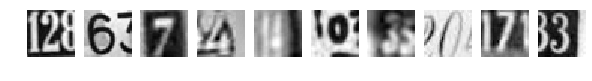

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]
Model Prediction for each of the above image: [2 6 7 4 4 0 3 1 7 3]


In [17]:
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train_original[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))
print('Model Prediction for each of the above image: %s' % nnmodelPredictions[0:10])

In [0]:
model.save('./svhn_ocr_model.hd5')

Deep Learning model is able to work with huge amount of data, particularly, multi-dimensional data and was able to perform better than that of traditional KNN model..
- for the traditional KNN algorithm we got accuracy of 35.6% only for the k value 16..
- but using ANN we got 94.01% for training set and 86.08% for test set which is a very good score for the model
- used batch normalization for training the neural network
- the error rate of the model was less than 14%..

Thus all the project objectives were covered and the required goals achieved.
